# **Introduction to linear regression**
Linear regression is a statistical model used to calculate relationship between two variables, the variables usually declared as x and y. X represents the independent variable while y represents dependent variable. 
Linear regression is written as below equation:

## **y = ax + b**

*   a = slope/gradient/coefficient
*   x = independent variable
*   b = intercept/bias
*   y = dependent variable








Reference :
https://medium.com/@jrendz/regresi-linier-dengan-r-dan-python-ebb80662c6da

# **Read and Understanding the data**


In [2]:
#import library
#here i import some libraries that will be used during the analysis 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#read data 
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#read column data
data.columns

Index(['Hours', 'Scores'], dtype='object')

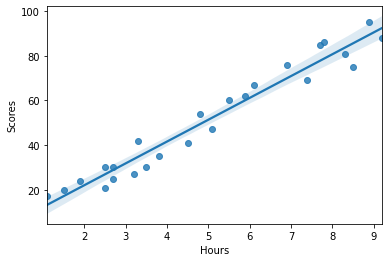

In [4]:
#plotting data using seaborn
#here I plot the data to understand the relationship between variable hours and variable scores
sns.regplot(x = "Hours", y = "Scores", data=data)


From the graph it can be seen that the higher the hours the higher scores will be gotten by the students. Based on the figure we can conclude that it is positive correlation, which means if x value increased the y value will follow as well.

In [5]:
#calculating coeeficient correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


We can also calculating coeeficient correlation from those two variables using function .corr(). The correlation between same variable will always 1. From the table above we can see that the correlation between Hours and Scores is 0.976... which means those two variables have a strong correlation.

# **Create Linear Regression Model**

In [8]:
#separate variable predictor and result into X and y
X = data.drop('Scores', axis=1)
X.head()


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [7]:
y = data["Scores"]
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [ ]:
#split data into data training and data testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#create linear regression model
from sklearn.linear_model import LinearRegression
lineg_model = LinearRegression()

#fit linear regression to training data
lineg_model.fit(X_train, y_train)

#predict testing data 
y_pred = lineg_model.predict(X_test)

In [ ]:
#comparing actual and prediction of testing data
df_compare = pd.DataFrame({'Actual' : y_test, 'Prediction': y_pred})
df_compare

,Actual,Prediction
18,67,62.925188
0,21,28.106035
1,47,53.253201
12,41,47.450009
22,35,40.679618
8,81,84.203560
5,20,18.434048


In [ ]:
#intercept and koefisien
intercept = lineg_model.intercept_
koefisien = lineg_model.coef_

print(intercept)
print(koefisien)

3.926067499965278
[9.67198701]


Now we get intercept and coefficient, if we formed them to Y = ax + b formula, it will be **Y = 9.67x + 3.92**

# **Evaluating the Model**

In [ ]:
#calculate MSE and R2_score
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test,y_pred)
print(MSE)

#calculate koefisien determination
R2 = r2_score(y_test, y_pred)
print(R2)

27.53971836839978
0.9378078071687903


# **Predict Using New Data**

In [ ]:
#predict using new data => Hours = 9.25
X_new = np.array([9.25]).reshape(-1,1)

y_pred_new = lineg_model.predict(X_new)
y_pred_new

array([93.3919473])

In [ ]:
#calculating using Y = ax + b formula
Y_news = 9.67198701 * 9.25 + 3.926067499965278
Y_news

93.39194734246527